### Importing Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
%matplotlib inline

In [4]:
# Importing ".json" file for the U.S. 

country_geo = r'C:\Users\aminj\Documents\DataSets\World University Rankings\custom.geo.json'

### Importing Dataset

In [6]:
path = r'C:\Users\aminj\Documents\DataSets\World University Rankings'

In [7]:
df = pd.read_csv(os.path.join(path, 'data', 'cwurData.csv'))

In [8]:
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [9]:
df.shape

(2200, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [12]:
dups = df.duplicated()

In [13]:
dups.shape

(2200,)

C:\Users\aminj\AppData\Local\Temp\ipykernel_169408\4170655077.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['world_rank'], bins=20)


<Axes: xlabel='world_rank', ylabel='Density'>

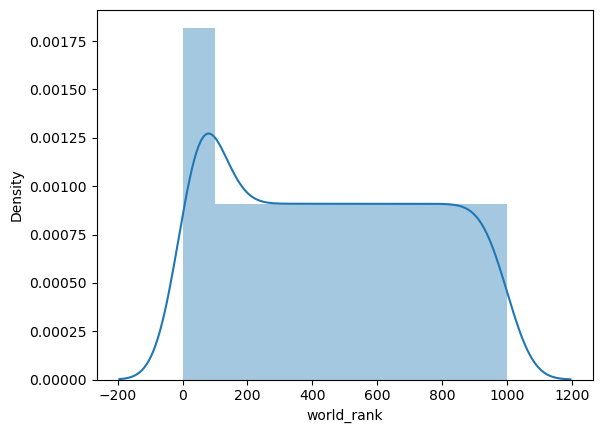

In [14]:
sns.distplot(df['world_rank'], bins=20)

In [15]:
df['world_rank'].mean()

459.59090909090907

In [16]:
df['world_rank'].median()

450.5

In [17]:
df['world_rank'].max()

1000

### Data prep for Regression Analysis

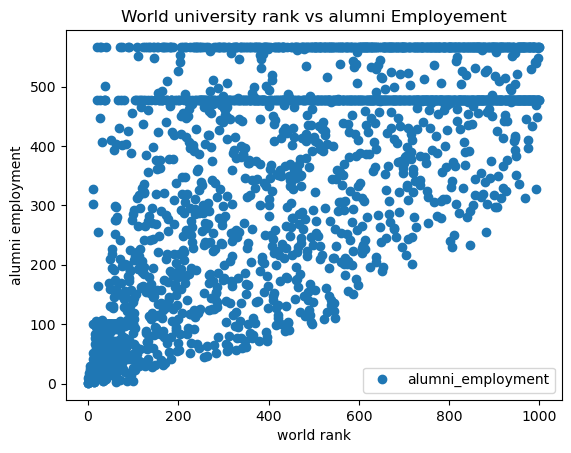

In [19]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'world_rank', y='alumni_employment',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('World university rank vs alumni Employement')  
plt.xlabel('world rank')  
plt.ylabel('alumni employment')  
plt.show()

In [109]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['world_rank'].values.reshape(-1,1)
y = df['quality_of_education'].values.reshape(-1,1)

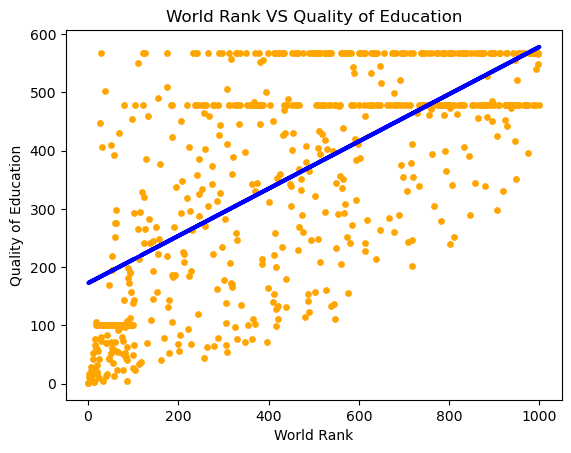

<Figure size 640x480 with 0 Axes>

In [117]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='orange', s = 15)
plot_test.plot(X_test, y_predicted, color='blue', linewidth =3)
plot_test.title('World Rank VS Quality of Education')
plot_test.xlabel('World Rank')
plot_test.ylabel('Quality of Education')
plot_test.show()
plt.savefig("rank VS Education set).png")

In [21]:
X

array([[   1],
       [   2],
       [   3],
       ...,
       [ 998],
       [ 999],
       [1000]], dtype=int64)

In [22]:
y

array([[  9],
       [ 17],
       [ 11],
       ...,
       [549],
       [567],
       [567]], dtype=int64)

In [23]:
# Splitting data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression Analysis

In [25]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set

In [26]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

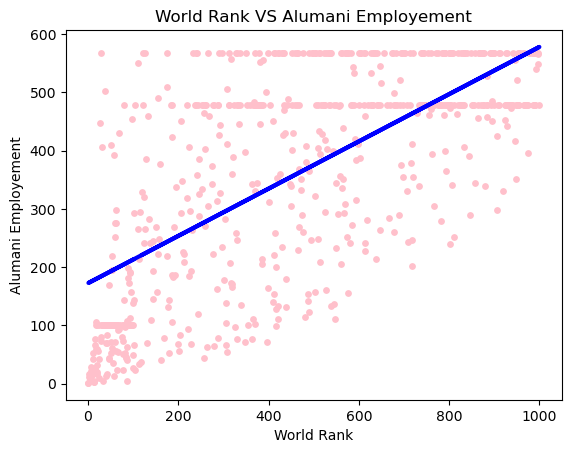

<Figure size 640x480 with 0 Axes>

In [107]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='pink', s = 15)
plot_test.plot(X_test, y_predicted, color='blue', linewidth =3)
plot_test.title('World Rank VS Alumani Employement')
plot_test.xlabel('World Rank')
plot_test.ylabel('Alumani Employement')
plot_test.show()
plt.savefig("rank VS employementTest set).png")

In [ ]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='pink', s = 15)
plot_test.plot(X_test, y_predicted, color='blue', linewidth =3)
plot_test.title('World Rank VS Alumani Employement')
plot_test.xlabel('World Rank')
plot_test.ylabel('Alumani Employement')
plot_test.show()
plt.savefig("rank VS employementTest set).png"

In [29]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [30]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.40573202]]
Mean squared error:  18680.715973555216
R2 score:  0.46598300718539476


In [31]:
y_predicted

array([[221.39864991],
       [240.46805481],
       [209.63242135],
       [198.67765682],
       [386.93731379],
       [201.11204894],
       [320.80299464],
       [253.45147943],
       [272.52088434],
       [522.85754026],
       [313.09408627],
       [564.24220623],
       [442.92833245],
       [353.6672882 ],
       [549.63585353],
       [296.45907348],
       [573.16831065],
       [433.19076399],
       [542.33267719],
       [573.97977469],
       [447.79711668],
       [382.47426157],
       [247.77123116],
       [537.05816093],
       [493.64483487],
       [576.41416681],
       [427.51051572],
       [354.47875224],
       [309.03676608],
       [218.96425779],
       [474.57542996],
       [188.53435634],
       [210.8496174 ],
       [266.02917203],
       [438.46528024],
       [461.59200534],
       [566.27086632],
       [547.60719344],
       [231.13621837],
       [319.9915306 ],
       [211.25534942],
       [413.30989504],
       [285.09857694],
       [243

In [32]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,567,221.398650
1,79,240.468055
2,191,209.632421
3,24,198.677657
4,403,386.937314
5,101,201.112049
6,478,320.802995
7,68,253.451479
8,326,272.520884
9,478,522.857540


In [33]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [34]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [35]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.40573202]]
Mean squared error:  19551.9324043994
R2 score:  0.43820543228633246


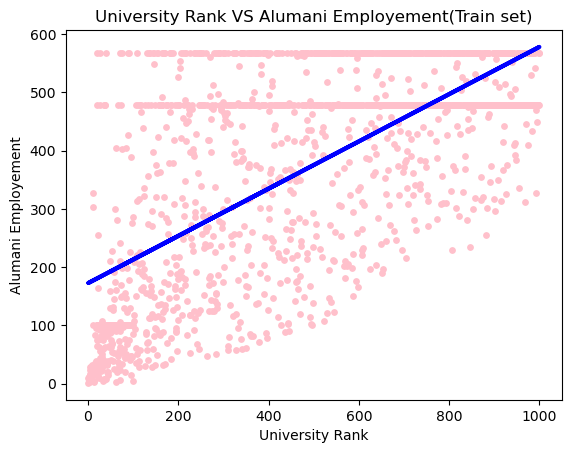

<Figure size 640x480 with 0 Axes>

In [36]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='pink', s = 15)
plot_test.plot(X_train, y_predicted_train, color='blue', linewidth =3)
plot_test.title('University Rank VS Alumani Employement(Train set)')
plot_test.xlabel('University Rank')
plot_test.ylabel('Alumani Employement')
plot_test.show()
plt.savefig("University Rank VS Alumani Employement(Train set).png")

In [37]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [38]:
df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


In [39]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [40]:
df = df.drop(columns = ['institution', 'country', 'broad_impact'])

In [41]:
df.isnull().sum()

world_rank              0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
patents                 0
score                   0
year                    0
dtype: int64

In [42]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 
score

[-1052112205.7787638,
 -414803031.7108141,
 -297914393.98613787,
 -254426056.34502736,
 -227842058.3677979,
 -210601692.41144475,
 -194491440.04654148,
 -187189154.0035802,
 -179175994.80524632]

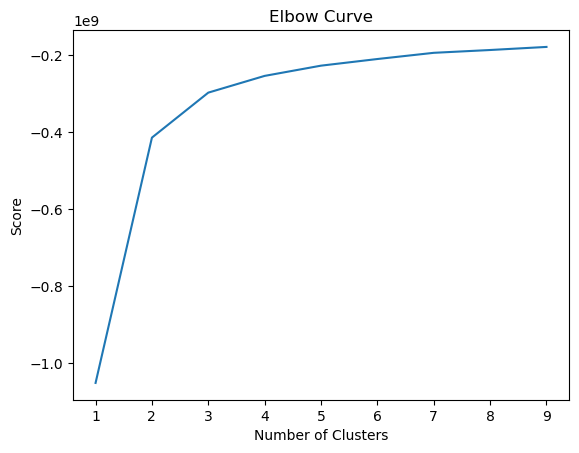

<Figure size 640x480 with 0 Axes>

In [43]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()
plt.savefig("Elbow curve.png")

## K-means Clustering

In [45]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [46]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

In [47]:
df['clusters'] = kmeans.fit_predict(df)

In [48]:
df.head()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year,clusters
0,1,1,7,9,1,1,1,1,5,100.00,2012,1
1,2,2,9,17,3,12,4,4,1,91.67,2012,1
2,3,3,17,11,5,4,2,2,15,89.50,2012,1
3,4,1,10,24,4,16,16,11,50,86.17,2012,1
4,5,4,2,29,7,37,22,22,18,85.21,2012,1


In [49]:
df['clusters'].value_counts()

clusters
2    808
1    701
0    691
Name: count, dtype: int64

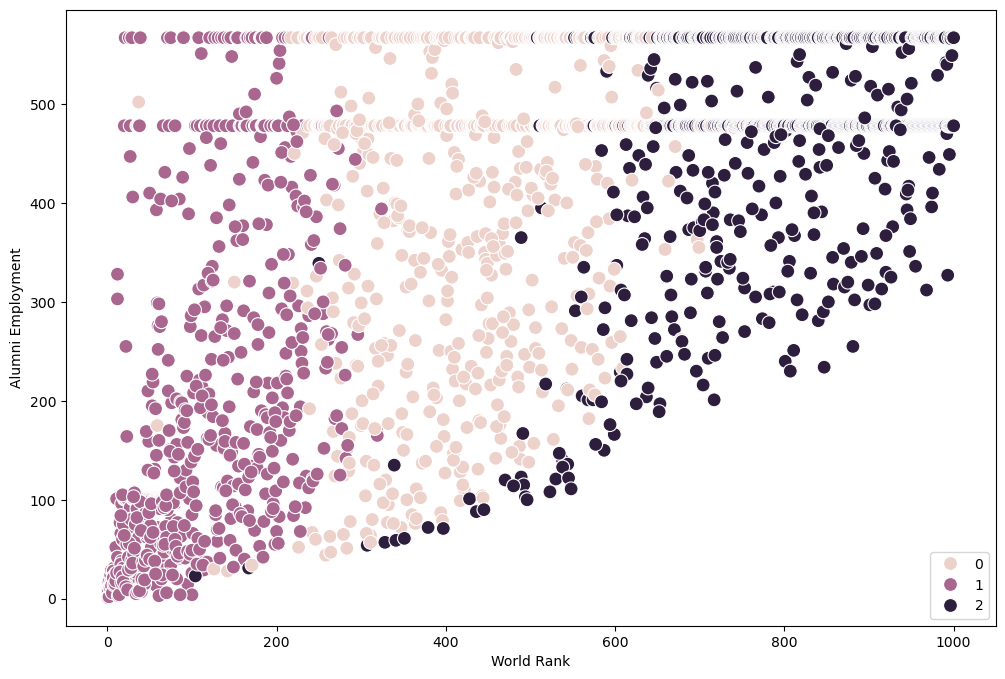

<Figure size 640x480 with 0 Axes>

In [50]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['world_rank'], y=df['alumni_employment'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('World Rank') # Label x-axis.
plt.ylabel('Alumni Employment') # Label y-axis.
plt.show()
plt.savefig("Cluster.png")

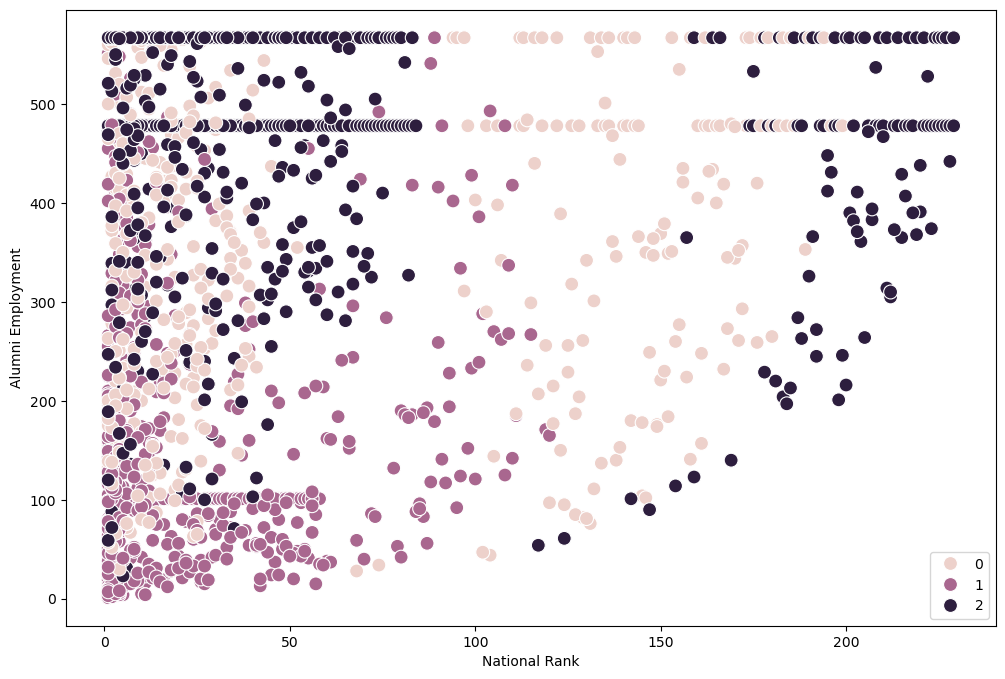

In [51]:


plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['national_rank'], y=df['alumni_employment'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('National Rank') 
plt.ylabel('Alumni Employment') 
plt.show()

In [52]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [53]:
df.head()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year,clusters,cluster
0,1,1,7,9,1,1,1,1,5,100.00,2012,1,purple
1,2,2,9,17,3,12,4,4,1,91.67,2012,1,purple
2,3,3,17,11,5,4,2,2,15,89.50,2012,1,purple
3,4,1,10,24,4,16,16,11,50,86.17,2012,1,purple
4,5,4,2,29,7,37,22,22,18,85.21,2012,1,purple


In [54]:
df.groupby('cluster').agg({'world_rank':['mean', 'median'], 
                         'national_rank':['mean', 'median'], 
                         'alumni_employment':['mean', 'median'],
                          'quality_of_education':['mean', 'median'], 'score':['mean', 'median']})

world_rank        national_rank        alumni_employment         \
                   mean median          mean median              mean median   
cluster                                                                        
dark purple  787.155941  798.5     52.883663   35.0        464.800743  478.0   
pink         433.481910  430.0     42.538350   19.0        406.875543  478.0   
purple       107.763195   89.0     23.520685   10.0        183.947218  101.0   

            quality_of_education             score         
                            mean median       mean median  
cluster                                                    
dark purple           343.998762  355.0  44.423391  44.38  
pink                  318.823444  355.0  45.444124  45.22  
purple                152.586305  101.0  54.009244  49.73